<a href="https://colab.research.google.com/github/Unkid/rts/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import random
import keras
import keras.backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
batch_size = 512
num_classes = 10
epochs = 10

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

cifar_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

img_rows = 32
img_cols = 32

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    #x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    #x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

print('data train shape: {0}, label train shape: {1}'.format(x_train.shape, y_train.shape))
print('data test shape: {0}, label test shape: {1}'.format(x_test.shape, y_test.shape))

data train shape: (50000, 32, 32, 3), label train shape: (50000, 1)
data test shape: (10000, 32, 32, 3), label test shape: (10000, 1)


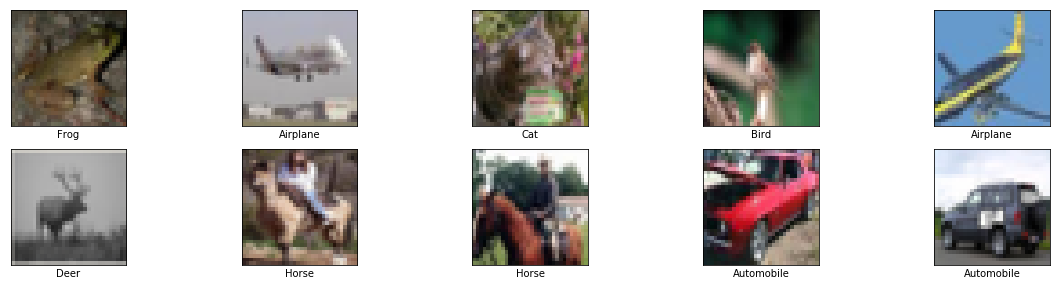

In [10]:
'''
fig = plt.figure(figsize=(20, 20))

for i in range(15):
    ax = fig.add_subplot(8, 5, i + 1, xticks=[], yticks=[])
    plt.grid(False)
    ax.set_xlabel(y_train[i])
    ax.imshow(x_train[i,:,:,0], cmap=plt.cm.binary)
'''  
plt.figure(figsize=(20,20))
for num, im_id in enumerate(np.random.choice(len(x_train), 10)):
    plt.subplot(8,5,num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[im_id], cmap=plt.cm.binary)
    plt.xlabel(cifar_labels[y_train[im_id][0]])
    
plt.show()

In [0]:
def plot_prediction(image, prediction, category_array=None):
    if category_array is None:
        category_array = range(len(prediction))
    true_result_id = np.argmax(prediction)
    
    plt.figure(figsize=(13,4))
    plt.subplot(1,2,1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel("'{}' - {:0.2f}%".format(category_array[true_result_id],
                            np.max(prediction)*100),
                            color='red')

    plt.subplot(1,2,2)
    plt.xticks(range(10), category_array, rotation=45)
    thisplot = plt.bar(range(10), prediction, color="#777777")
    plt.ylim([0,1])
    thisplot[true_result_id].set_color('red')

    plt.show()

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


In [13]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Dropout(0.4))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



W0704 22:59:29.816496 140128847464320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 22:59:29.840327 140128847464320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 22:59:29.843915 140128847464320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 22:59:29.863205 140128847464320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0704 22:59:29.874800 

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
__________

In [16]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = 'adam',
              metrics = ['accuracy'])

W0704 22:59:52.060291 140128847464320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0704 22:59:52.096966 140128847464320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [17]:

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, validation_split=0.2)


score = model.evaluate(x_test, y_test, verbose=0)
print('\n\nTest loss:', score[0])
print('Test accuracy:', score[1])

W0704 22:59:55.836495 140128847464320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 143s 4ms/step - loss: 1.8098 - acc: 0.3390 - val_loss: 1.7953 - val_acc: 0.4470
Epoch 2/10
40000/40000 [==============================] - 143s 4ms/step - loss: 1.4652 - acc: 0.4689 - val_loss: 1.5806 - val_acc: 0.5323
Epoch 3/10
40000/40000 [==============================] - 143s 4ms/step - loss: 1.3280 - acc: 0.5249 - val_loss: 1.4695 - val_acc: 0.5532
Epoch 4/10
40000/40000 [==============================] - 142s 4ms/step - loss: 1.2314 - acc: 0.5608 - val_loss: 1.4242 - val_acc: 0.5523
Epoch 5/10
40000/40000 [==============================] - 143s 4ms/step - loss: 1.1626 - acc: 0.5884 - val_loss: 1.3137 - val_acc: 0.5961
Epoch 6/10
40000/40000 [==============================] - 143s 4ms/step - loss: 1.0819 - acc: 0.6148 - val_loss: 1.2551 - val_acc: 0.6292
Epoch 7/10
40000/40000 [==============================] - 143s 4ms/step - loss: 1.0344 - acc: 0.6338 - val_loss: 1.1787 - 

In [0]:
def plot_history(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

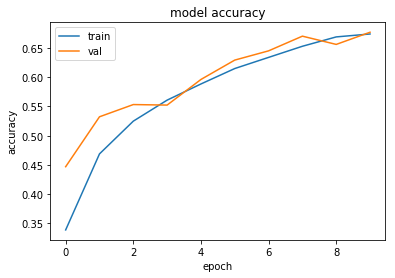

In [19]:
plot_history(history)

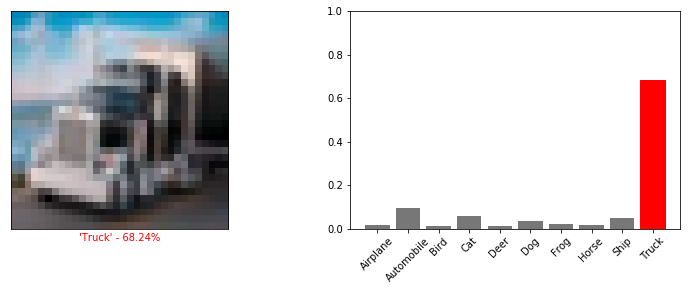

In [22]:

predictions = model.predict(x_test)
rand_el = random.randint(0, len(predictions)-1)
plot_prediction(x_test[rand_el], predictions[rand_el], cifar_labels)


In [24]:
model.save('my_model.h5')

saved_model = keras.models.load_model('my_model.h5')
pred_class = saved_model.predict_classes(x_test[16].reshape(-1, 32, 32, 3))
print(pred_class)

[5]
